---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 3

In this assignment you will explore measures of centrality on two networks, a friendship network in Part 1, and a blog network in Part 2.

## Part 1

Answer questions 1-4 using the network `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

*The network has been loaded as networkx graph object `G1`.*

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import operator


G1 = nx.read_gml('friendships.gml')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


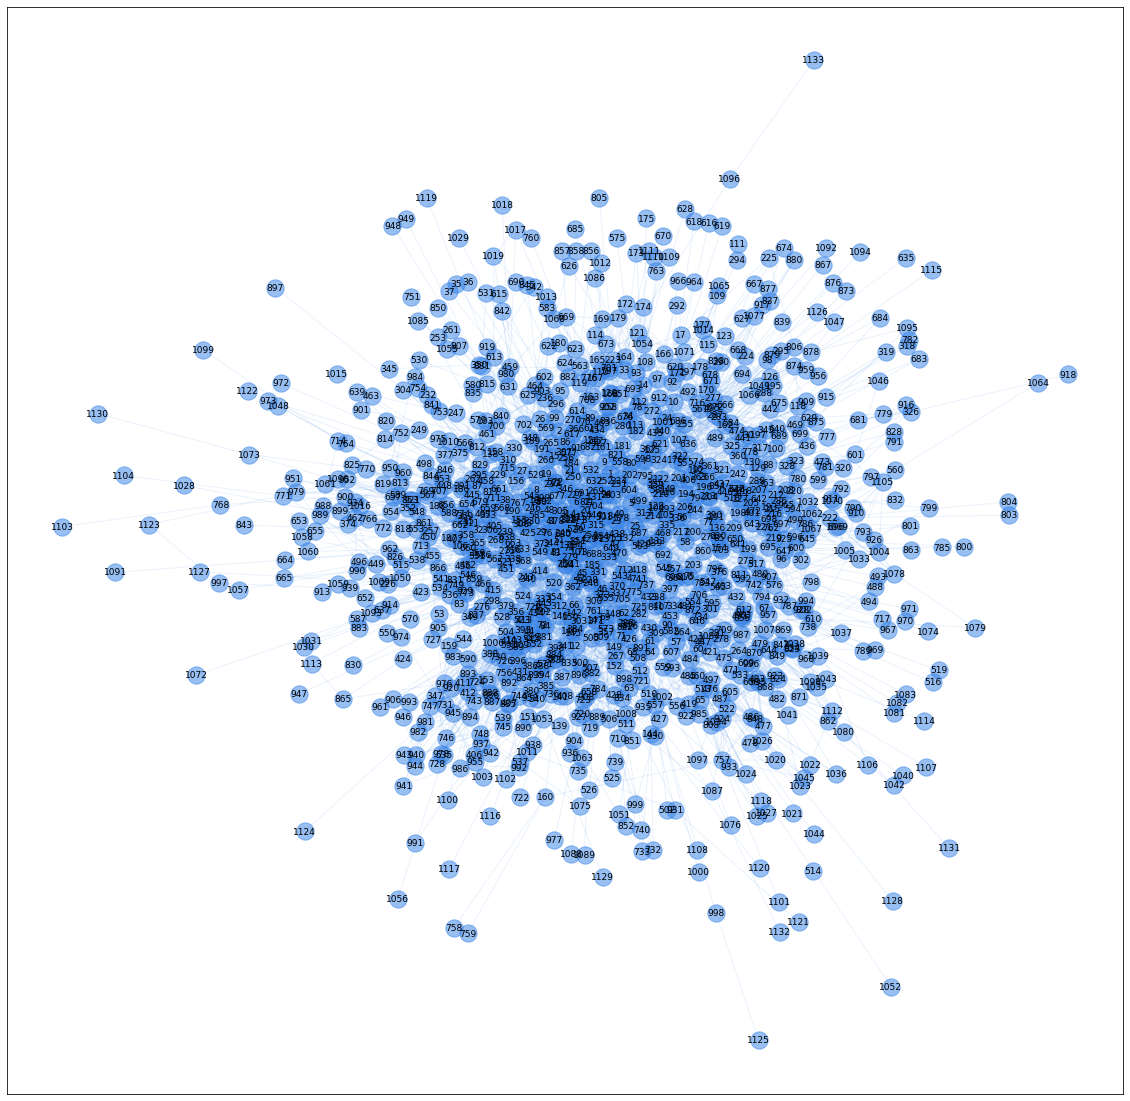

In [3]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(G1, node_color = (.2,.5,.9,.5),
                 edge_color = (.2,.5,.9,.1), font_size = 9)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


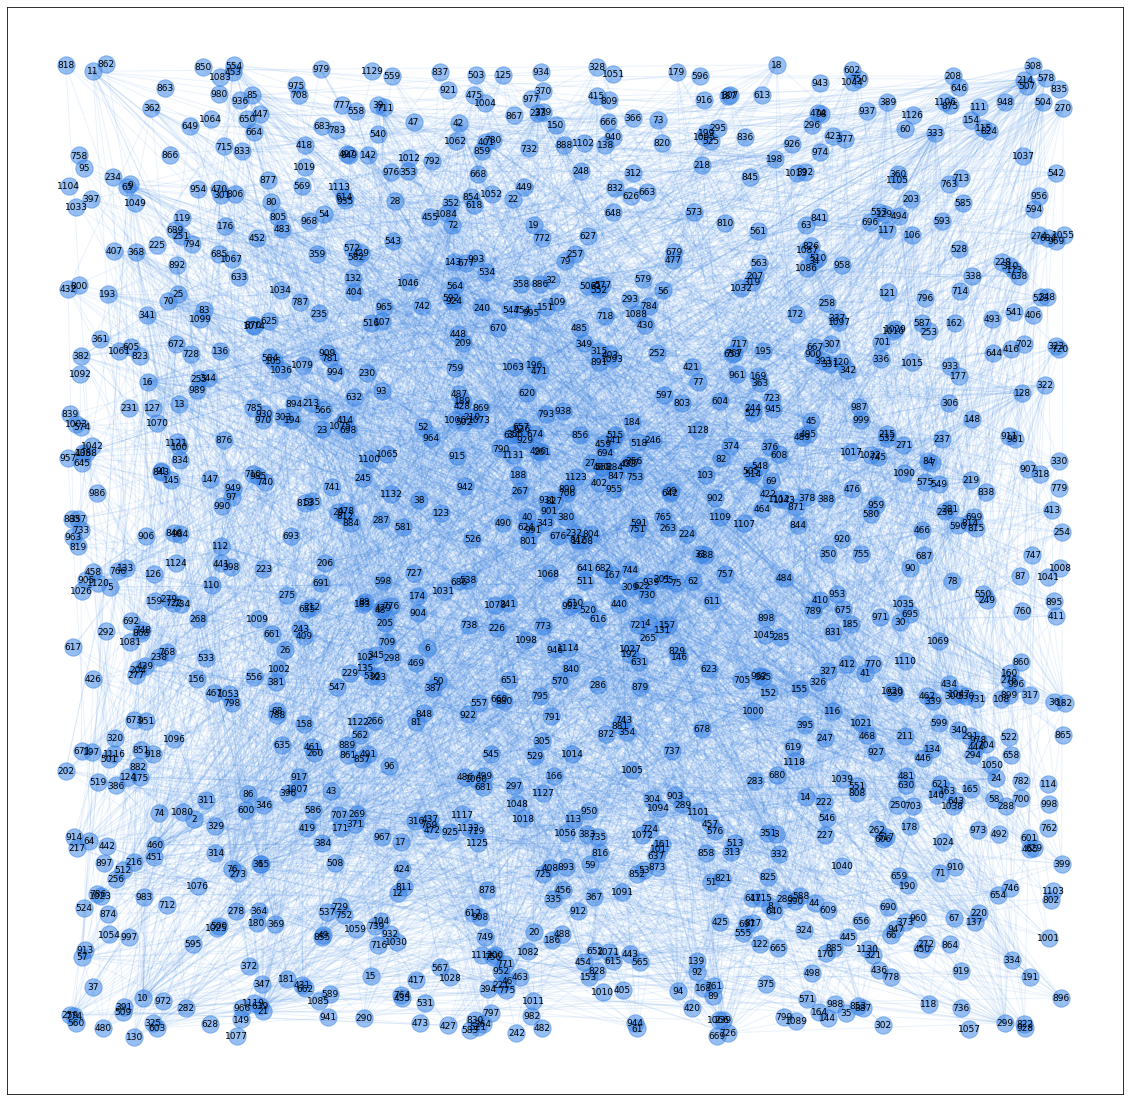

In [4]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(G1,  pos = nx.random_layout(G1),
                 node_color = (.2,.5,.9,.5),
                 edge_color = (.2,.5,.9,.1), font_size = 9)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


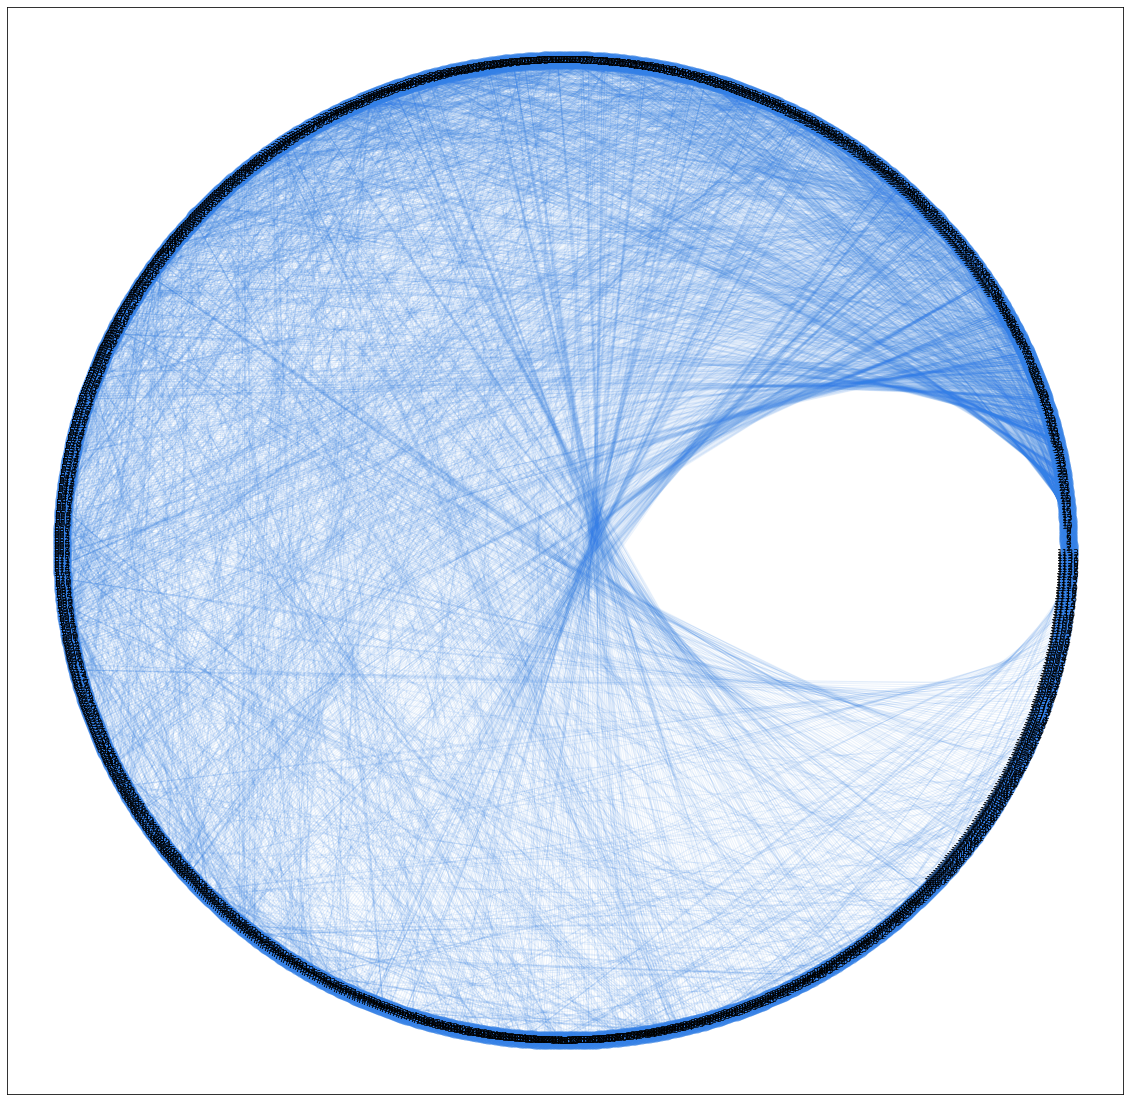

In [5]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(G1,  pos = nx.circular_layout(G1),
                 node_color = (.2,.5,.9,.5),
                 edge_color = (.2,.5,.9,.1), font_size = 9)

In [6]:
print("The number of persons = "+str(G1.number_of_nodes()))
print("The number of friendships = "+str(G1.number_of_edges()))
print()
print("The graph connectivity:")
print("Connected" if nx.is_connected(G1) else "Not connected")
print("The average shortest path between all persons in the graph " 
      + "is = {:.3f}".format(nx.average_shortest_path_length(G1)))

print("The largest distance between any two persons in the graph" 
      + ", the diameter, is = {}".format(nx.diameter(G1)))

print("The minimum eccentricity in the graph" 
      + ", the radius, is = {}".format(nx.radius(G1)))

The number of persons = 1133
The number of friendships = 5453

The graph connectivity:
Connected
The average shortest path between all persons in the graph is = 3.606
The largest distance between any two persons in the graph, the diameter, is = 8
The minimum eccentricity in the graph, the radius, is = 5


In [7]:
print("The persons in the periphery of the friendship graph are: "+
     str(nx.periphery(G1)))

print("The persons in the center of the friendship graph are: "+
     str(nx.center(G1)))

The persons in the periphery of the friendship graph are: [1103, 1125, 1132, 1133]
The persons in the center of the friendship graph are: [1, 2, 3, 6, 7, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 31, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 62, 65, 68, 69, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 86, 87, 92, 94, 101, 104, 105, 106, 107, 116, 117, 120, 124, 128, 131, 132, 133, 134, 135, 137, 140, 143, 145, 147, 150, 155, 157, 182, 183, 185, 187, 188, 196, 201, 204, 206, 210, 213, 227, 228, 230, 233, 234, 235, 237, 238, 239, 240, 241, 243, 245, 246, 248, 251, 254, 255, 256, 259, 262, 267, 268, 269, 270, 271, 275, 279, 284, 303, 305, 308, 314, 315, 316, 332, 333, 334, 335, 338, 339, 340, 341, 346, 351, 353, 354, 355, 356, 358, 362, 364, 367, 368, 369, 371, 372, 373, 376, 377, 378, 380, 381, 382, 384, 385, 389, 392, 393, 396, 399, 410, 413, 415, 416, 420, 425, 429, 439, 443, 444, 446, 451, 452, 454, 457, 458, 460, 464, 466, 467, 470, 484, 504

### Question 1

Find the degree centrality, closeness centrality, and normalized betweeness centrality (excluding endpoints) of node 100.

*This function should return a tuple of floats `(degree_centrality, closeness_centrality, betweenness_centrality)`.*

In [8]:
def answer_one():
        
    # Your Code Here
    deg_cen = nx.degree_centrality(G1)[100]
    close_cen = nx.closeness_centrality(G1)[100]
    bet_cen = nx.betweenness_centrality(G1, normalized = True,
                                        endpoints = False)[100]
    
    return (deg_cen, close_cen, bet_cen)

(deg_cen, close_cen, bet_cen) = answer_one()
print("The degree centrality for node 100 is = "+ str(deg_cen))
print("The closeness centrality for node 100 is = "+ str(close_cen))
print("The betweenness centrality for node 100 is = "+ str(bet_cen))

The degree centrality for node 100 is = 0.0026501766784452294
The closeness centrality for node 100 is = 0.2654784240150094
The betweenness centrality for node 100 is = 7.142902633244772e-05


<br>
#### For Questions 2, 3, and 4, assume that you do not know anything about the structure of the network, except for the all the centrality values of the nodes. That is, use one of the covered centrality measures to rank the nodes and find the most appropriate candidate.
<br>

### Question 2

Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid. Apply your knowledge in network centrality to select the best candidate for the voucher. 

*This function should return an integer, the name of the node.*

In [9]:
def answer_two():
        
    # The voucher should be sent to the node
    # with the highest degree centrality
    # as it is most connected
    cen_dict = nx.degree_centrality(G1)
    
    #node = pd.Series(cen_dict).sort_values(
    #        ascending = False).index[0]
    
    node = sorted(cen_dict.items(),
                  key = lambda x : x[1],
                  reverse = True)[0][0]
    
    return node

node = answer_two()
print("The most important node in this scenario is "+str(node))


The most important node in this scenario is 105


### Question 3

Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches the nodes in the lowest average number of hops.

How would you change your selection strategy? Write a function to tell us who is the best candidate in the network under this condition.

*This function should return an integer, the name of the node.*

In [10]:
def answer_three():
        
    # The voucher should be sent to the node
    # with the highest closeness centrality
    # as it the closest to all other nodes on average
    cen_dict = nx.closeness_centrality(G1)
    
    node = sorted(cen_dict.items(),
                  key = lambda x : x[1],
                  reverse = True)[0][0]
    
    return node

node = answer_three()
print("The most important node in this scenario is "+str(node))

The most important node in this scenario is 23


### Question 4

Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. Your competitor is specifically targeting people who are often bridges of information flow between other pairs of people. Identify the single riskiest person to be removed under your competitor’s strategy?

*This function should return an integer, the name of the node.*

In [11]:
def answer_four():
        
    # Your Code Here
    cen_dict = nx.betweenness_centrality(G1)
    
    node = sorted(cen_dict.items(),
                  key = lambda x : x[1],
                  reverse = True)[0][0]
    
    return node

node = answer_four()
print("The most important node in this scenario is "+str(node))

The most important node in this scenario is 333


## Part 2

`G2` is a directed network of political blogs, where nodes correspond to a blog and edges correspond to links between blogs. Use your knowledge of PageRank and HITS to answer Questions 5-9.

In [3]:
G2 = nx.read_gml('blogs.gml')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


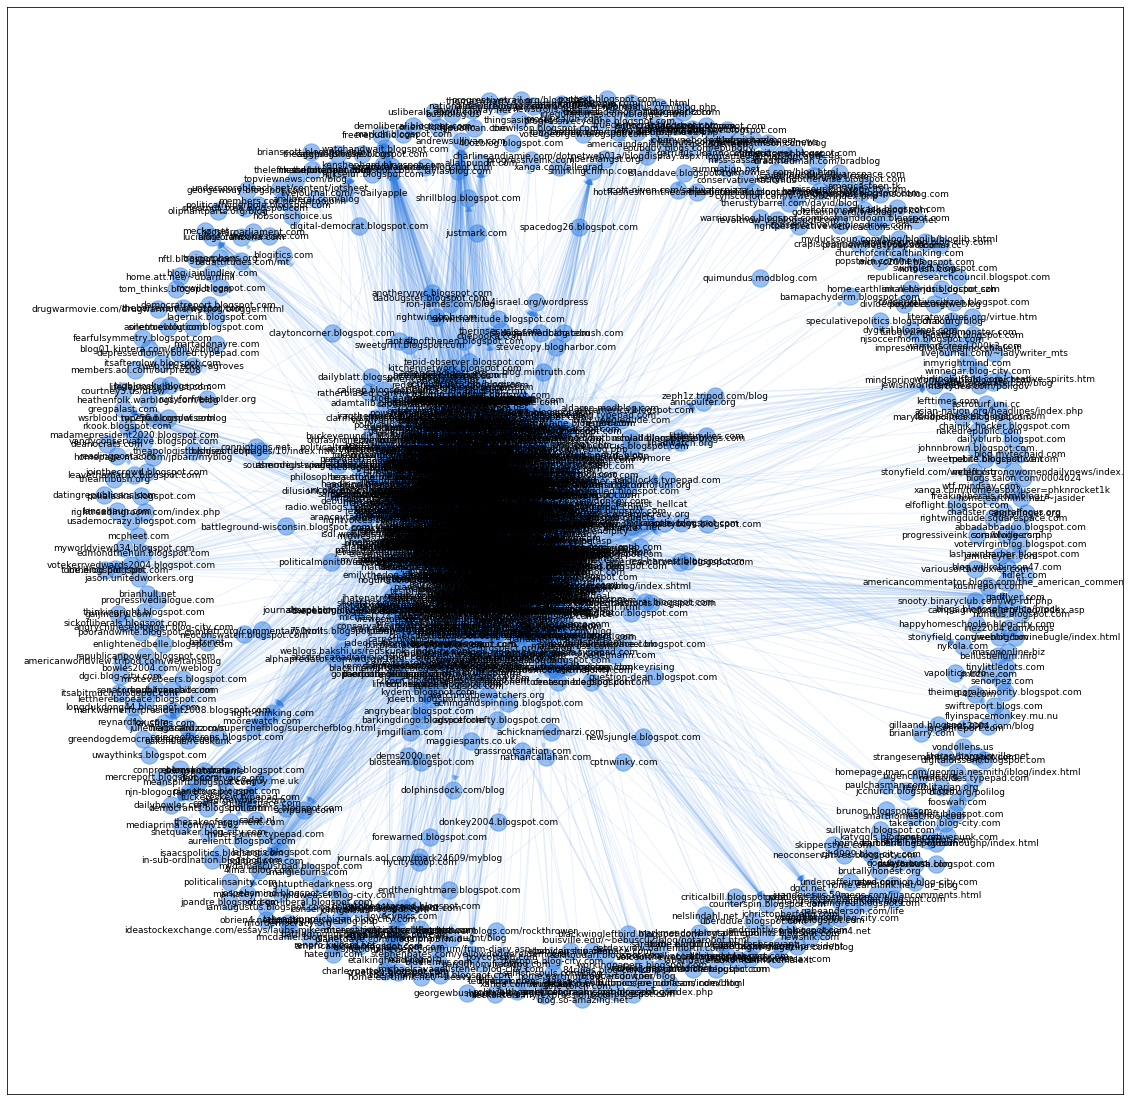

In [16]:
plt.figure(figsize=(20, 20))
nx.draw_networkx(G2, node_color = (.2,.5,.9,.5),
                 edge_color = (.2,.5,.9,.1), font_size = 9)

In [25]:
print("The number of persons = "+str(G2.number_of_nodes()))
print("The number of friendships = "+str(G2.number_of_edges()))
print()
print("The graph connectivity:")
print("Weakly Connected" if nx.is_weakly_connected(G2) else "Not weakly connected")
print("Strongly Connected" if nx.is_strongly_connected(G2) else "Not strongly connected")

The number of persons = 1490
The number of friendships = 19025

The graph connectivity:
Not weakly connected
Not strongly connected


### Question 5

Apply the Scaled Page Rank Algorithm to this network. Find the Page Rank of node 'realclearpolitics.com' with damping value 0.85.

*This function should return a float.*

In [9]:
def answer_five():
        
    # Your Code Here
    page_rank = nx.pagerank(G2, alpha = 0.85)['realclearpolitics.com']
    
    return page_rank

page_rank = answer_five()

print("The page rank of node 'realclearpolitics.com' with damping value of 0.85 is = "+
     str(page_rank))


The page rank of node 'realclearpolitics.com' with damping value of 0.85 is = 0.004636694781649094


### Question 6

Apply the Scaled Page Rank Algorithm to this network with damping value 0.85. Find the 5 nodes with highest Page Rank. 

*This function should return a list of the top 5 blogs in desending order of Page Rank.*

In [28]:
def answer_six():
        
    # Your Code Here
    page_ranks = nx.pagerank(G2, alpha = 0.85)
    top5_ranks_tuples = sorted(page_ranks.items(),
                               key = lambda x : x[1],
                               reverse = True)[0:5]
    top5_blogs_map = map(lambda x : x[0], top5_ranks_tuples)
    
    return list(top5_blogs_map)


#list(map(lambda x : x[0], sorted(nx.pagerank(G2, alpha = 0.85).items(),
#       key = lambda x : x[1],
#      reverse = True)[0:5]))

top5_blogs_list = answer_six()
print("The blogs with the top 5 page ranks with damping value of 0.85 are \n"+
     str(top5_blogs_list))

The blogs with the top 5 page ranks with damping value of 0.85 are 
['dailykos.com', 'atrios.blogspot.com', 'instapundit.com', 'blogsforbush.com', 'talkingpointsmemo.com']


### Question 7

Apply the HITS Algorithm to the network to find the hub and authority scores of node 'realclearpolitics.com'. 

*Your result should return a tuple of floats `(hub_score, authority_score)`.*

In [ ]:
def answer_seven():
        
    # Your Code Here
    
    return # Your Answer Here

### Question 8 

Apply the HITS Algorithm to this network to find the 5 nodes with highest hub scores.

*This function should return a list of the top 5 blogs in desending order of hub scores.*

In [ ]:
def answer_eight():
        
    # Your Code Here
    
    return # Your Answer Here

### Question 9 

Apply the HITS Algorithm to this network to find the 5 nodes with highest authority scores.

*This function should return a list of the top 5 blogs in desending order of authority scores.*

In [ ]:
def answer_nine():
        
    # Your Code Here
    
    return # Your Answer Here